In [16]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep,time
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib as mpl
mpl.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\Hemanth\\Downloads\\ffmpeg-20200528-c0f01ea-win64-static\\ffmpeg-20200528-c0f01ea-win64-static\\bin\\ffmpeg.exe'
from IPython.display import HTML
from IPython.core.display import clear_output
from warnings import warn
warn("Warning Simulation")

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Warning Simulation
  


In [105]:
url='https://www.iplt20.com/stats/2008/most-runs'
response = get(url)
#print(response.text)
html_soup = BeautifulSoup(response.text,'html.parser')
html_soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="IPLT20.com - Indian Premier League Official Website" name="twitter:title"/>
<meta content="ipl, iplt20, indian premier league, ipl cricket, ipl match, ipl live, ipl score, ipl scorecard, ipl stats, ipl schedule, ipl results, ipl points table, ipl teams, ipl videos, ipl teams, ipl news, BCCI IPL" name="keywords"/>
<meta content="website" property="og:type"/>
<meta content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates." name="description"/>
<meta content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates." name="twitter:description"/>
<meta content="IPLT20.com - Indian Premier League Official Website" property="og:title"/>
<title>IPLT20.com - Indian Premier League Official Website</title>
<meta content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates." property="og:description"/>
<meta charset="utf-8"/>
<meta content="width=device-width, in

In [114]:
player_containers = html_soup.find_all('div', class_='top-players__player-name')
print(len(containers))
#print(containers)
containers[0].text

100


'\n\n                            Shaun\n                            Marsh\n\n'

In [106]:
'''
player_containers = html_soup.find_all('a', class_='top-players__player-link')
print(type(player_containers))
print(len(player_containers))
print(player_containers)
'''

<class 'bs4.element.ResultSet'>
87
[<a class="top-players__player-link" href="/teams/kings-xi-punjab/squad/191/shaun-marsh">
                            Shaun
                            <span class="top-players__last-name">Marsh</span>
</a>, <a class="top-players__player-link" href="/teams/delhi-capitals/squad/84/gautam-gambhir">
                            Gautam
                            <span class="top-players__last-name">Gambhir</span>
</a>, <a class="top-players__player-link" href="/teams/mumbai-indians/squad/342/sanath-jayasuriya">
                            Sanath
                            <span class="top-players__last-name">Jayasuriya</span>
</a>, <a class="top-players__player-link" href="/teams/rajasthan-royals/squad/227/shane-watson">
                            Shane
                            <span class="top-players__last-name">Watson</span>
</a>, <a class="top-players__player-link" href="/teams/rajasthan-royals/squad/219/graeme-smith">
                           

In [36]:
runs_containers = html_soup.find_all('td', class_='top-players__r is-active')
print(len(runs_containers))
runs_containers[0].text.strip()

100


'692'

In [77]:
team_containers = html_soup.find_all('div', class_='top-players__team')
print(len(team_containers))
name = "".join([ch for ch in str(team_containers[3].span)[-13:-9].strip() if ch.isalpha()])
name

100


'DC'

In [80]:
Name=[]
Runs=[]
Team=[]
for container1,container2,container3 in zip(player_containers,runs_containers,team_containers):
    Name.append(" ".join(container1.text.strip().replace("\n","").split()))
    Runs.append(container2.text.strip())
    Team.append("".join([ch for ch in str(container3.span)[-13:-9].strip() if ch.isalpha()]))
    #instock.append(container.find('p',class_='instock availability').text.strip())
    #print(container.find('p',class_='star-rating'))
print(Name)
print(Runs)

['David Warner', 'KL Rahul', 'Quinton de Kock', 'Shikhar Dhawan', 'Andre Russell', 'Chris Gayle', 'Rishabh Pant', 'Virat Kohli', 'Shreyas Iyer', 'Jonny Bairstow', 'AB de Villiers', 'Suryakumar Yadav', 'MS Dhoni', 'Chris Lynn', 'Rohit Sharma', 'Hardik Pandya', 'Shane Watson', 'Faf du Plessis', 'Ajinkya Rahane', 'Suresh Raina', 'Parthiv Patel', 'Prithvi Shaw', 'Manish Pandey', 'Nitish Rana', 'Sanju Samson', 'Mayank Agarwal', 'Steve Smith', 'Jos Buttler', 'Shubman Gill', 'Ambati Rayudu', 'Robin Uthappa', 'Kieron Pollard', 'Dinesh Karthik', 'Vijay Shankar', 'Moeen Ali', 'David Miller', 'Marcus Stoinis', 'Colin Ingram', 'Krunal Pandya', 'Sarfaraz Khan', 'Nicholas Pooran', 'Mandeep Singh', 'Kedar Jadhav', 'Riyan Parag', 'Kane Williamson', 'Sunil Narine', 'Rahul Tripathi', 'Ben Stokes', 'Mohammad Nabi', 'Axar Patel', 'Ravindra Jadeja', 'Ishan Kishan', 'Yuvraj Singh', 'Gurkeerat Mann Singh', 'Sam Curran', 'Shimron Hetmyer', 'Wriddhiman Saha', 'Colin Munro', 'Martin Guptill', 'Dwayne Bravo', 'S

In [81]:
df = pd.DataFrame({'Name':Name,'Team':Team,'Runs':Runs})
df

,Name,Team,Runs
0,David Warner,SRH,692
1,KL Rahul,KXIP,593
2,Quinton de Kock,MI,529
3,Shikhar Dhawan,DC,521
4,Andre Russell,KKR,510
...,...,...,...
95,Carlos Brathwaite,KKR,11
96,Ishant Sharma,DC,10
97,Shakib Al Hasan,SRH,9
98,Pawan Negi,RCB,9


In [38]:
pages=[str(i) for i in range(1,51)]
start_time = time()
requests=0
for _ in range(5):
    requests+=1
    sleep(random.randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {} Frequency: {} requests/s'.format(requests,requests/elapsed_time))
    clear_output(wait=True)

Request: 5 Frequency: 0.6238055747578429 requests/s


In [3]:
Years = list(range(2008,2020))
Years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [4]:
Name=[]
Team=[]
Runs=[]
Year=[]

In [5]:
start_time=time()
requests=0
for year in Years:
    url = 'https://www.iplt20.com/stats/'+str(year)+'/most-runs'
    print(year)
    response=get(url)
    
    sleep(random.randint(8,15))
    requests+=1
    elapsed_time = time() - start_time
    print('Request: {} Frequency: {} requests/s'.format(requests,requests/elapsed_time))
    clear_output(wait=True)
    
    if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
    
    html_soup = BeautifulSoup(response.text,'html.parser')
    player_containers = html_soup.find_all('div', class_='top-players__player-name')
    #player_containers = html_soup.find_all('a', class_='top-players__player-link')
    runs_containers = html_soup.find_all('td', class_='top-players__r is-active')
    team_containers = html_soup.find_all('div', class_='top-players__team')
    
    for container1,container2,container3 in zip(player_containers,runs_containers,team_containers):
        Name.append(" ".join(container1.text.strip().replace("\n","").split()))
        Runs.append(container2.text.strip())
        Team.append("".join([ch for ch in str(container3.span)[-13:-9].strip() if ch.isalpha()]))
        Year.append(year)
    
    
    

2019
Request: 12 Frequency: 0.07328322709790062 requests/s


In [6]:
df = pd.DataFrame({'Name':Name,'Team':Team,'Year':Year,'Runs':Runs})
df['Runs'] = df['Runs'].astype(int)

#df_group = df.groupby('Name')
#print(df_group)
#df_group.get_group('David Warner')
#player_dict = df_group.groups
players = list(df['Name'].unique())
for player in players:
    #df_player = df[df['Name']==player]
    #print(df.loc[:,('Name','Runs')])
    #data.loc[data.bidder == 'parakeet2004', 'bidderrate'] = 100
    df.loc[df.Name == player, 'Cumulative_Runs'] = df[df['Name']==player]['Runs'].cumsum()
    #df[df['Name']==player]['Cumulative_Runs']=df[df['Name']==player]['Runs'].cumsum()
    #df_player.loc[:'Cumulative_Runs'] = df_player['Runs'].cumsum()
    #df_player['Cumulative_Runs'] = df_player['Runs'].cumsum()
    #print(df_player)
    #final_df.append(df_player)
    #print('')
df

,Name,Team,Year,Runs,Cumulative_Runs
0,Shaun Marsh,KXIP,2008,616,616.0
1,Gautam Gambhir,DC,2008,534,534.0
2,Sanath Jayasuriya,MI,2008,518,518.0
3,Shane Watson,RR,2008,472,472.0
4,Graeme Smith,RR,2008,441,441.0
...,...,...,...,...,...
1195,Carlos Brathwaite,KKR,2019,11,169.0
1196,Ishant Sharma,DC,2019,10,42.0
1197,Shakib Al Hasan,SRH,2019,9,745.0
1198,Pawan Negi,RCB,2019,9,362.0


In [67]:
df[df['Name']=='Virat Kohli']

,Name,Team,Year,Runs,Cumulative_Runs
37,Virat Kohli,RCB,2008,165,165.0
117,Virat Kohli,RCB,2009,246,411.0
218,Virat Kohli,RCB,2010,307,718.0
301,Virat Kohli,RCB,2011,557,1275.0
415,Virat Kohli,RCB,2012,364,1639.0
502,Virat Kohli,RCB,2013,634,2273.0
618,Virat Kohli,RCB,2014,359,2632.0
704,Virat Kohli,RCB,2015,505,3137.0
800,Virat Kohli,RCB,2016,973,4110.0
922,Virat Kohli,RCB,2017,308,4418.0


## To see the top 10 by year

In [126]:
year = 2019
df_year = df[df['Year']==year]
df_year.sort_values('Cumulative_Runs',inplace=True,ascending=False)
df_year = df_year[:15]

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Basic bar graph

<BarContainer object of 15 artists>

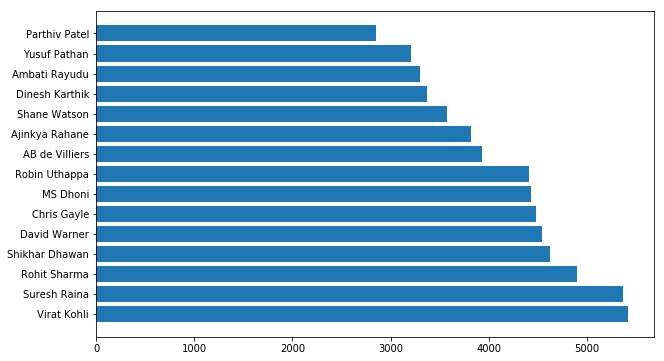

In [127]:
#Top 10 run scorers for the year 2019
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(df_year['Name'],df_year['Cumulative_Runs'])

In [128]:
teams = list(df['Team'].unique())
#print(teams)
codes = ['#EC6973','#7D7EC2','#5DADE2','#6A6CF3','#626292','#DCD779','#EC6C60','#D7BDE2','#EDBB99','#AED6F1','#F8C471','#D2B4DE','#EDBB99']
colors = dict(zip(teams,codes))
group_map_year = df_year.set_index('Name')['Team'].to_dict()
#group_map_year
df_year = df_year[::-1]

Text(1,0.4,'2019')

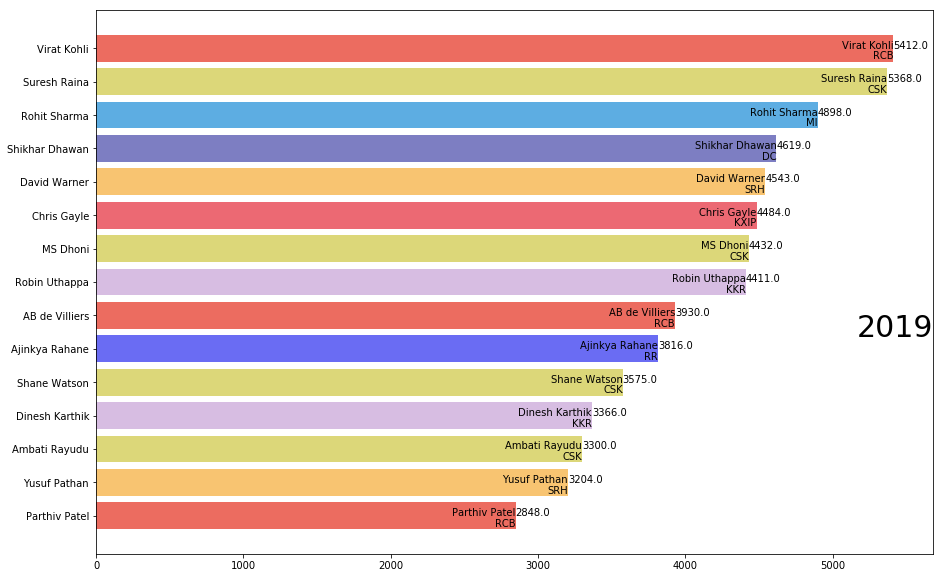

In [129]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(df_year['Name'][:15],df_year['Cumulative_Runs'][:15], color = [colors[group_map_year[name]] for name in df_year['Name']])
for i, (runs, name) in enumerate(zip(df_year['Cumulative_Runs'][:15], df_year['Name'][:15])):
    ax.text(runs, i, name, ha='right')
    ax.text(runs, i-.32, group_map_year[name], ha='right')
    ax.text(runs, i, runs, ha='left')
ax.text(1, 0.4, year, transform=ax.transAxes, size=30, ha='right')

In [15]:
teams = list(df['Team'].unique())
codes = ['#EC6973','#7D7EC2','#5DADE2','#6A6CF3','#626292','#DCD779','#EC6C60','#D7BDE2','#EDBB99','#AED6F1','#F8C471','#D2B4DE','#EDBB99']
colors = dict(zip(teams,codes))

def draw_barchart(year):
    df_year = df[df['Year']==year]
    group_map_year = df_year.set_index('Name')['Team'].to_dict()
    df_year.sort_values('Cumulative_Runs',inplace=True,ascending=False)
    df_year = df_year[:10]
    df_year = df_year[::-1]
    ax.clear()
    
    ax.barh(df_year['Name'][:15],df_year['Cumulative_Runs'][:15], color = [colors[group_map_year[name]] for name in df_year['Name']])
    dx = df_year['Cumulative_Runs'].max() / 200
    for i, (runs, name) in enumerate(zip(df_year['Cumulative_Runs'][:15], df_year['Name'][:15])):
        ax.text(runs-dx, i, name, size=14, weight=600, ha='right', va='bottom')
        ax.text(runs-dx, i-.32, group_map_year[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(runs+dx, i, runs, size=14, ha='left',  va='center')
    ax.text(1.05, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    
    
    ax.text(0, 1.06, 'Cumulative Runs', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The leading Run Scorers in IPL',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @hemanth_ramireddy; credit @pratap_vardhan', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


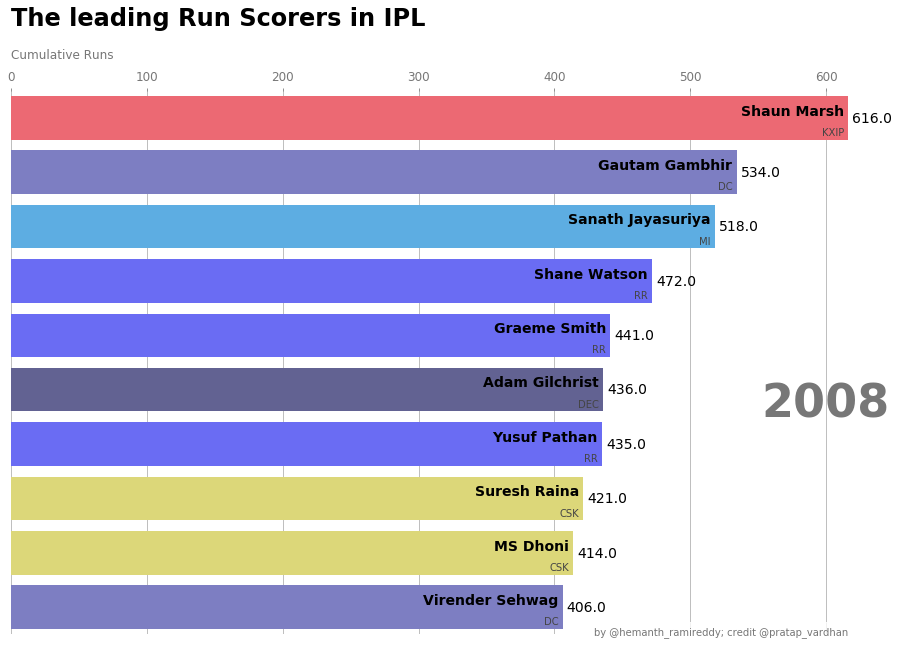

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2008, 2020), interval=100, save_count=1500)
#HTML(animator.to_jshtml()) 
#Writer = animation.writers['pillow']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#animator.save('im', writer=writer)
#animator.save('im')

#animator.save('runs_video')
# or use animator.to_html5_video() or animator.save()
f = r"c://Users/Hemanth/Desktop/animation.mp4" 
writervideo = animation.FFMpegWriter(fps=1) 
animator.save(f, writer=writervideo)

